# EDA

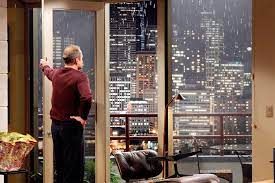

In [3]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<Axes: >

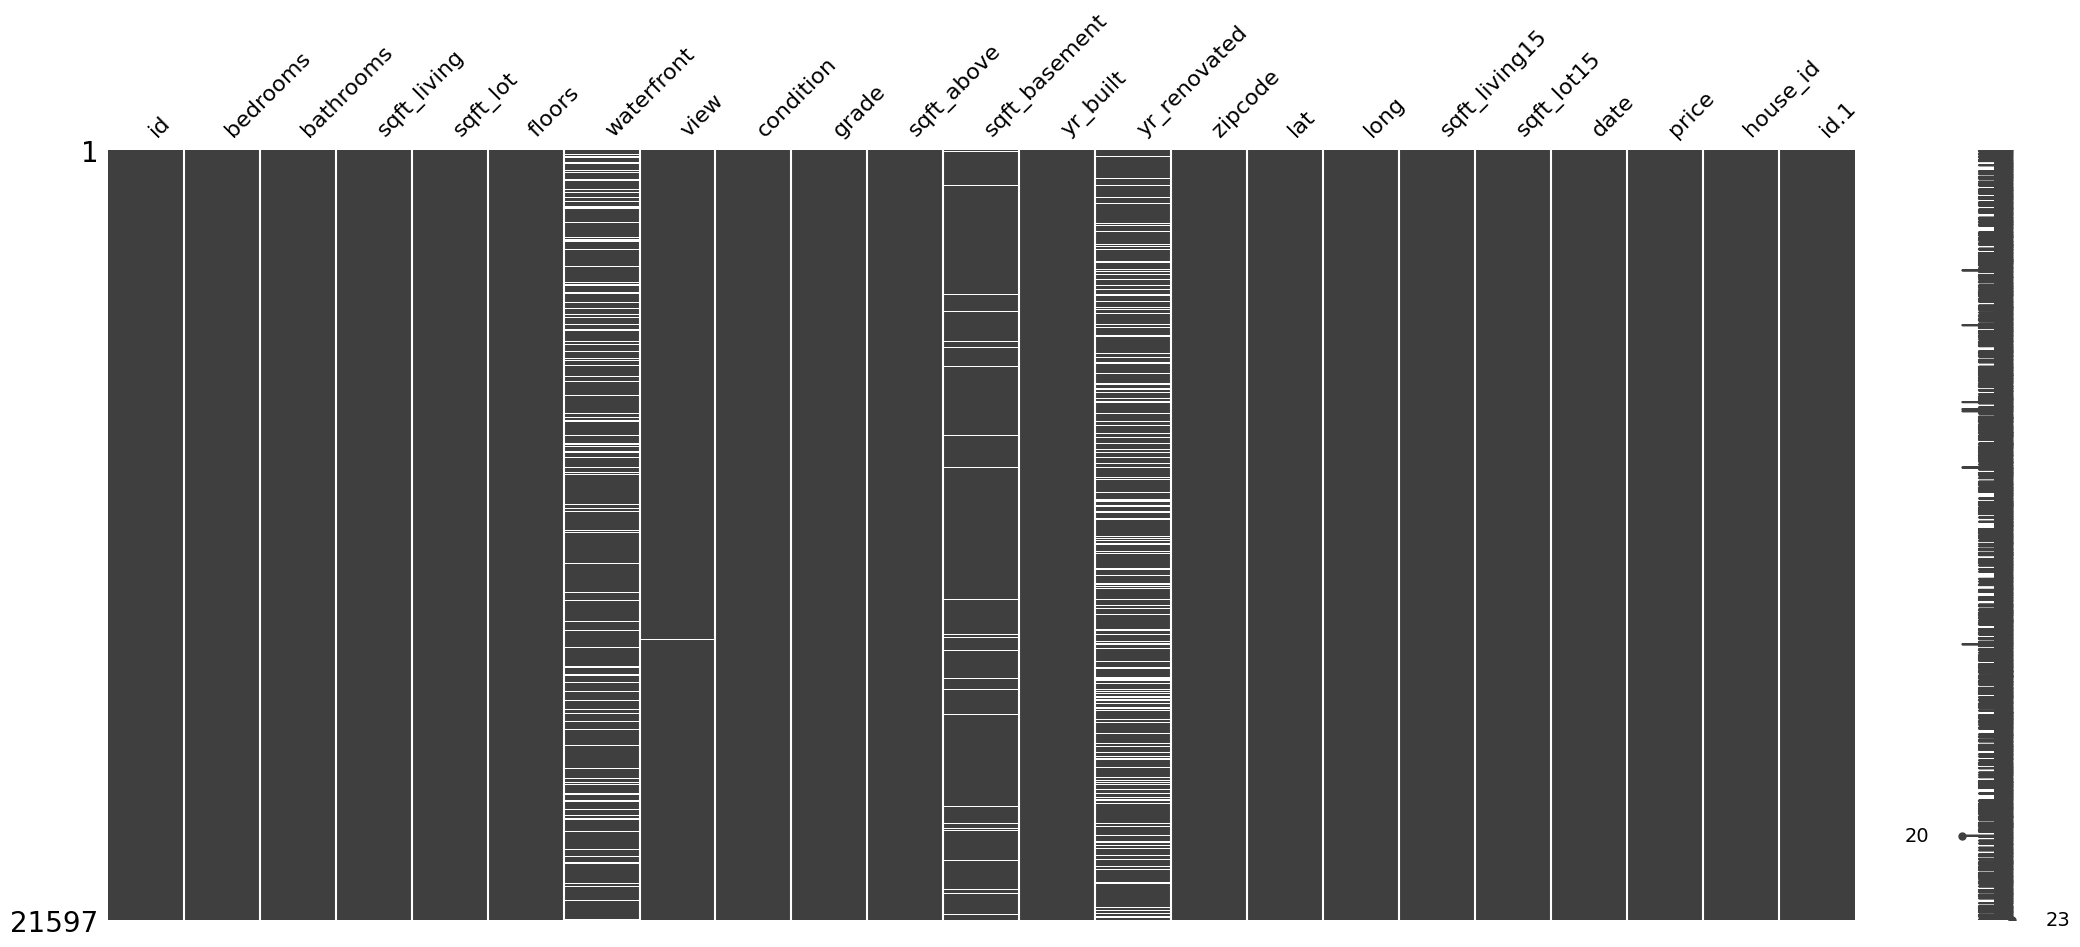

In [7]:
#import the house details from csv
df_houses = pd.read_csv('data/house_details.csv')

#display first 5 rows
df_houses.head()

#import missingno and display the form of the dataframe
import missingno as msno
msno.matrix(df_houses)